# Project 5 Sales Prediction

## 1. Importing the Data

In [49]:
import pandas as pd

data = pd.read_csv("Advertising.csv")

## 2. Data Cleaning

In [39]:
data.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [40]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [41]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

## 3. Exploratory data Analysis

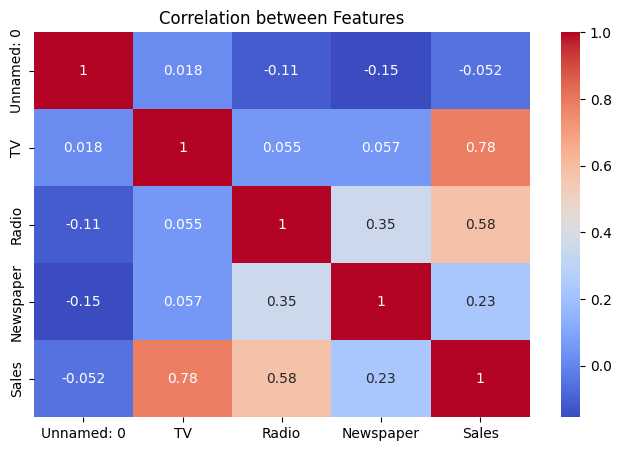

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = data.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation between Features")
plt.show()

## 4. Splitting the data

In [43]:
from sklearn.model_selection import train_test_split

X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Training the Ml Model

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

## 6.Testing the Ml Model

In [45]:
y_pred_gb = gb_model.predict(X_test)

comparison = pd.DataFrame({'Actual Sales': y_test.values,'Predicted (GB)': y_pred_gb.round(2)})
print(comparison.head(10))

   Actual Sales  Predicted (GB)
0          16.9           17.42
1          22.4           21.75
2          21.4           20.27
3           7.3            6.52
4          24.7           23.62
5          12.6           13.05
6          22.3           22.85
7           8.4            9.44
8          11.5           11.90
9          14.9           15.87


## 7. Evaluating the Model

In [46]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Mean Squared Error: {mse_gb:.2f}")
print(f"R² Score: {r2_gb:.2f}")

Mean Squared Error: 0.53
R² Score: 0.98


## 8. Visualization

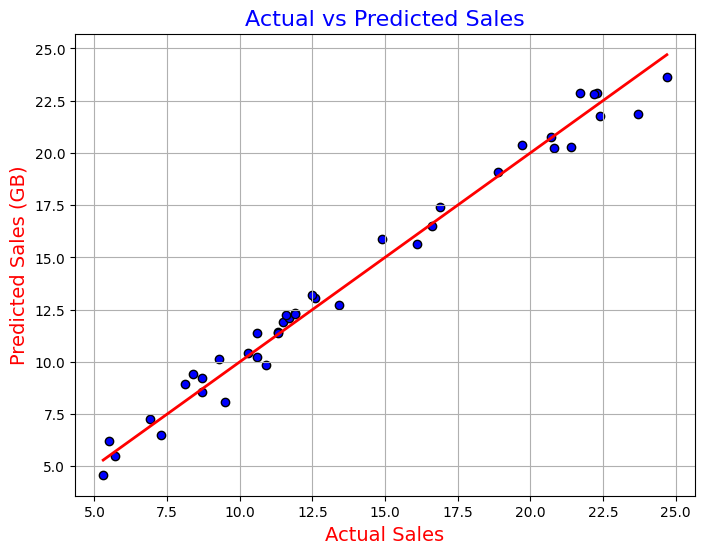

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, color='blue', edgecolor='k')  
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  
plt.xlabel('Actual Sales', color='red', fontsize=14)
plt.ylabel('Predicted Sales (GB)', color='red', fontsize=14)
plt.title('Actual vs Predicted Sales', fontsize=16, color='blue')
plt.grid(True)
plt.show()


## 9. Predicting new sales

In [48]:
new_data = pd.DataFrame({'TV': [150], 'Radio': [25], 'Newspaper': [20]})

predicted_sales = model.predict(new_data)
print(f"Predicted Sales: {predicted_sales[0]:.2f} units")

Predicted Sales: 14.47 units
